<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/well/wellcalcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Oil and gas Wells

#Litterature

https://www.youtube.com/watch?v=wjm5k6Kf-RU

https://www.youtube.com/watch?v=YQtDiX2Dbr0

Production Engineering: Flow in Well Tubing

https://www.e-education.psu.edu/png301/node/526

#Calculation of flow productivity from oil and gas wells

Calculating flow productivity from oil and gas wells involves using inflow performance relationships (IPR), which are equations that describe how the well production rate varies with the flowing bottom-hole pressure (FBHP). These equations are crucial for predicting the performance of the well under different operating conditions. There are several common models for this:

1. **Vogel's Model**: This is one of the simplest and most widely used models for oil wells. It assumes a radial flow regime and is typically used for wells producing from solution-gas drive reservoirs. The basic form of Vogel's equation is:

   $ q = q_{max} \left( 1 - 0.2 \frac{p_{wf}}{p_r} - 0.8 \left( \frac{p_{wf}}{p_r} \right)^2 \right) $

   where $ q $ is the production rate, $ q_{max} $ is the maximum production rate (at zero bottom-hole flowing pressure), $ p_{wf} $ is the bottom-hole flowing pressure, and $ p_r $ is the average reservoir pressure.

2. **Darcy's Law**: This is a fundamental equation used to describe the flow of fluids in porous media and can be applied to both oil and gas wells. The equation is:

   $ q = \frac{k A (p_r - p_{wf})}{\mu B h} $

   where $ k $ is the permeability of the rock, $ A $ is the cross-sectional area of the flow, $ \mu $ is the fluid viscosity, $ B $ is the formation volume factor, $ h $ is the thickness of the reservoir, and $ p_r $ and $ p_{wf} $ are as described above.

3. **For Gas Wells**: The inflow performance of gas wells is often described using a modified form of Darcy's law, taking into account the specific properties of gas, such as its compressibility. The equation is usually presented in a form that includes the gas flow rate, reservoir pressure, bottom-hole pressure, and factors related to the properties of the reservoir and the gas.

For pure gas wells, the inflow performance relationships (IPR) can be a bit more complex due to the compressible nature of gas. Here are some common equations used to calculate flow productivity in gas wells:

1. **Simple Linear IPR Model**:
   This is a basic model where the gas flow rate is directly proportional to the difference in pressure between the reservoir and the bottom-hole. The equation is:
   $ q = C \cdot (p_r^2 - p_{wf}^2) $
   where $ q $ is the gas flow rate, $ C $ is a constant that incorporates well and reservoir properties, $ p_r $ is the average reservoir pressure, and $ p_{wf} $ is the bottom-hole flowing pressure.

2. **Real Gas Potential Equation**:
The Real Gas Potential Equation is an important tool for predicting the performance of gas wells, especially under varying pressure conditions. In SI units, this equation is often expressed as follows:

$ q = \frac{7.08 \times 10^{-3} \times k \times h \times \left( p_r^2 - p_{wf}^2 \right)}{\mu \times z \times T} \ln \left( \frac{p_r + \sqrt{p_r^2 - p_{wf}^2}}{p_{wf}} \right) $

Where:
- $ q $ is the gas flow rate in cubic meters per day (m³/day).
- $ k $ is the permeability of the formation in millidarcies (mD).
- $ h $ is the thickness of the gas-bearing formation in meters (m).
- $ p_r $ is the average reservoir pressure in Pascals (Pa).
- $ p_{wf} $ is the flowing bottom hole pressure in Pascals (Pa).
- $ \mu $ is the gas viscosity in Pascal-seconds (Pa.s).
- $ z $ is the gas deviation factor (dimensionless).
- $ T $ is the temperature of the gas in the reservoir in Kelvin (K).

To convert $ k $ from millidarcies to the SI unit (m²), use the conversion factor $ 1 \text{ mD} = 9.869233 \times 10^{-16} \text{ m}^2 $.

3. **Non-Darcy Flow Equation**:
   For high-rate gas wells, non-Darcy flow effects can become significant. The IPR in such cases is adjusted to account for these effects. The equation often takes a form like:
   $ q = \left( \frac{2 \pi k h}{\mu z \ln(r_e/r_w)} \right) \left( p_r^2 - p_{wf}^2 \right) - \beta q^2 $
   where $ \beta $ is a non-Darcy flow coefficient, and $ r_e $ and $ r_w $ are the external radius of the drainage area and the wellbore radius, respectively.

## Simple Linear IPR Model


In [2]:
def linear_ipr_si(p_r, p_wf, C):
    # p_r and p_wf in Pascals, C in appropriate units (1/s²)
    q = C * (p_r**2 - p_wf**2)
    return q

# Example usage
p_r = 2.07e7  # Reservoir pressure in Pascals (3000 psi ≈ 2.07e7 Pa)
p_wf = 6.9e6  # Bottom-hole flowing pressure in Pascals (1000 psi ≈ 6.9e6 Pa)
C = 1.233e-10  # Constant in 1/s² (converted from original units)

flow_rate_si = linear_ipr_si(p_r, p_wf, C)
print(f"Flow Rate: {flow_rate_si} m³/s")


Flow Rate: 46962.504 m³/s


## Real Gas Potential Equation

In [3]:
import math

def real_gas_potential_si(k_mD, h, p_r, p_wf, mu, z, T):
    # Convert permeability from mD to m²
    k = k_mD * 9.869233e-16

    # Implementing the Real Gas Potential Equation in SI units
    q = (7.08e-3 * k * h * (p_r**2 - p_wf**2)) / (mu * z * T) * math.log((p_r + math.sqrt(p_r**2 - p_wf**2)) / p_wf)

    # Converting m³/s to m³/day
    q_m3_per_day = q * 86400

    return q_m3_per_day

# Example usage
k_mD = 50  # Permeability in millidarcies
h = 30  # Thickness of the gas reservoir in meters
p_r = 2.07e7  # Average reservoir pressure in Pascals
p_wf = 1.38e7  # Flowing bottom hole pressure in Pascals
mu = 1e-5  # Gas viscosity in Pa.s
z = 0.9  # Gas deviation factor
T = 350  # Reservoir temperature in Kelvin

flow_rate = real_gas_potential_si(k_mD, h, p_r, p_wf, mu, z, T)
print(f"Flow Rate: {flow_rate} m³/day")



Flow Rate: 65863617.471509494 m³/day


#Calculation of inflow perfomance in wells based on well tests

Calculating inflow performance in wells based on well test data typically involves analyzing the relationship between the well's production rate and its flowing bottom-hole pressure (FBHP). This process, often referred to as building an Inflow Performance Relationship (IPR), is crucial for understanding how a well will perform under different pressure conditions.

The steps to calculate inflow performance from well test data are as follows:

1. **Gather Well Test Data**: Collect data from well tests, including production rates (oil, gas, water) and corresponding FBHPs for each test point.

2. **Plot the Data**: Plot the production rate against FBHP. For oil wells, it's common to plot the oil rate versus the FBHP. For gas wells, plot the gas rate against the square of the FBHP.

3. **Fit a Curve to the Data**: Depending on the type of well and reservoir (oil or gas, type of drive mechanism), different types of curves or equations are used. Common models include:
    - **Vogel's model** for oil wells.
    - **Real Gas Potential equation** for gas wells.


Here's a basic Python example to demonstrate how you might process and fit a curve to well test data for an oil well using Vogel's model:

This code provides a basic framework for analyzing well test data to build an IPR. For more accurate and detailed analysis, especially for gas wells or more complex reservoir conditions, additional data processing and more sophisticated models might be needed.

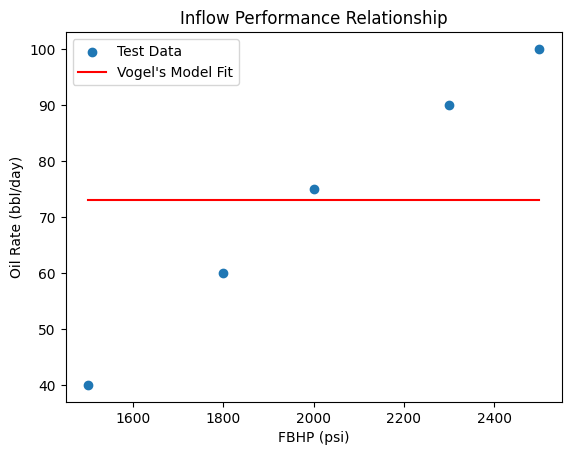

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example well test data (oil rate vs FBHP)
fbhp = np.array([2500, 2300, 2000, 1800, 1500])  # FBHP in psi
oil_rate = np.array([100, 90, 75, 60, 40])  # Oil rate in barrels per day

# Vogel's model
def vogels_model(p, pr, q_max):
    return q_max * (1 - 0.2 * (p/pr) - 0.8 * (p/pr)**2)

# Assuming a known average reservoir pressure (pr) and max oil rate (q_max)
pr = 3000  # Average reservoir pressure in psi
q_max = max(oil_rate)  # Max oil rate observed

# Fit Vogel's model to the data
popt, _ = curve_fit(vogels_model, fbhp, oil_rate, p0=[pr, q_max])

# Plotting the data and the fitted curve
plt.scatter(fbhp, oil_rate, label='Test Data')
plt.plot(fbhp, vogels_model(fbhp, *popt), label='Vogel\'s Model Fit', color='red')
plt.xlabel('FBHP (psi)')
plt.ylabel('Oil Rate (bbl/day)')
plt.legend()
plt.title('Inflow Performance Relationship')
plt.show()

#Flow of oil and gas in wells
Simulating flow in oil and gas wells is a complex task that integrates principles from fluid dynamics, thermodynamics, rock mechanics, and more. The specific equations used can vary based on the details of the simulation and the assumptions made. However, here's a basic summary of the primary equations involved:

1. **Darcy's Law for Single Phase Flow**:
   Describes the flow of a fluid through a porous medium.
   $ q = -kA\frac{\Delta P}{\mu L} $
   Where:
   - $ q $ = flow rate (m³/s)
   - $ k $ = permeability of the rock (m²)
   - $ A $ = cross-sectional area perpendicular to the flow (m²)
   - $ \Delta P $ = pressure drop across the length $ L $ (Pa)
   - $ \mu $ = fluid viscosity (Pa.s)
   - $ L $ = length over which the pressure drop occurs (m)

2. **Multiphase Flow**:
   The flow of oil, gas, and sometimes water concurrently in a well can be described using relative permeabilities and phase saturations. The generalized Darcy's law for a phase $ i $ becomes:
   $ q_i = -\frac{k k_{ri}}{\mu_i}A\frac{\Delta P}{L} $
   Where:
   - $ k_{ri} $ = relative permeability for phase $ i $
   - $ \mu_i $ = viscosity of phase $ i $

3. **Conservation of Mass**:
   For any phase $ i $:
   $ \frac{\partial (\phi \rho_i S_i)}{\partial t} + \nabla \cdot (\rho_i \mathbf{v}_i) = q_i $
   Where:
   - $ \phi $ = porosity of the rock
   - $ \rho_i $ = density of phase $ i $
   - $ S_i $ = saturation of phase $ i $
   - $ \mathbf{v}_i $ = Darcy velocity of phase $ i $
   - $ q_i $ = source/sink term (e.g., well injection/production rate)

4. **Conservation of Momentum**:
   The most basic form is the mechanical energy balance or the hydraulic gradient equation:
   $ \frac{\Delta P}{L} = \rho g h + \frac{1}{2} \rho v^2 + f \frac{\rho v^2}{2D} $
   Where:
   - $ \rho $ = fluid density
   - $ g $ = gravitational acceleration
   - $ h $ = elevation head (height difference)
   - $ v $ = fluid velocity
   - $ D $ = pipe diameter
   - $ f $ = friction factor

5. **PVT Relations**:
   Equations that relate pressure, volume, and temperature for oil and gas. These can be empirical correlations, cubic equations of state (like Peng-Robinson), or tabulated lab data.

6. **Wellbore Flow Performance (Inflow and Outflow Curves)**:
   $ P_{wf} = P_r - q \times IPR $ for inflow
   $ P_{wf} = P_{wh} + \Delta P_{friction} + \Delta P_{elevation} $ for outflow
   Where:
   - $ P_{wf} $ = flowing bottomhole pressure
   - $ P_r $ = reservoir pressure
   - $ P_{wh} $ = wellhead pressure
   - $ IPR $ = Inflow Performance Relationship (function or curve describing reservoir deliverability)

7. **Temperature Profiles**:
   Considering joule-thomson effect, frictional heating, geothermal gradient, etc., can be essential for deep wells or when simulating well interventions.

Simulation of flow in wells often involves coupling these equations and solving them iteratively. Advanced simulations might incorporate more complex phenomena like phase transitions, non-Newtonian fluid behavior, thermal effects, and rock-fluid interactions. Commercial reservoir and well simulators often solve these equations using numerical techniques like finite difference or finite element methods.


#Beggs and Brills method


The Beggs and Brill method is a widely recognized empirical method used for predicting multiphase flow in vertical and inclined wellbore tubing, primarily in the oil and gas industry. Developed by J.R. Brill and H. Beggs at the University of Tulsa in the 1960s, this method helps in predicting pressure drops for flowing gas-liquid mixtures in pipes.

Here's a summary of the key equations and concepts associated with the Beggs and Brill method:

1. **Flow Pattern Prediction**:
   Flow pattern is an essential component for subsequent calculations. The method categorizes flow patterns into:
   - Bubble Flow
   - Slug Flow
   - Transition Flow (only in upward flow in inclined and vertical pipes)
   - Annular Flow
   A set of dimensionless groups and curves derived from experimental data are used to determine which flow regime is present.

2. **Liquid Holdup, $ \epsilon $**:
   The liquid holdup represents the fraction of the pipe cross-sectional area that's occupied by the liquid phase. An empirical correlation derived from experimental data provides the liquid holdup:
   $ \epsilon = f(Fr, N_{LV}, \theta, \rho_L, \rho_G) $
   Where:
   - $ Fr $ is the Froude number
   - $ N_{LV} $ is a dimensionless liquid velocity number
   - $ \theta $ is the angle of inclination of the pipe
   - $ \rho_L $ and $ \rho_G $ are the densities of the liquid and gas phases, respectively.

3. **Frictional Pressure Drop**:
   The frictional pressure drop, $ \Delta P_f $, is given as:
   $ \Delta P_f = f_p \times \frac{L}{D} \times \frac{\rho_m v^2}{2} $
   Where:
   - $ f_p $ is the two-phase friction factor, which is determined using empirical correlations based on flow regime.
   - $ L $ is the length of the pipe segment.
   - $ D $ is the pipe diameter.
   - $ \rho_m $ is the two-phase mixture density.
   - $ v $ is the mixture velocity.

4. **Gravitational Pressure Drop**:
   The gravitational pressure drop, $ \Delta P_g $, due to the hydrostatic head of the fluid column, is calculated as:
   $ \Delta P_g = \epsilon \rho_L g h + (1 - \epsilon) \rho_G g h $
   Where:
   - $ g $ is the acceleration due to gravity.
   - $ h $ is the height of the pipe segment.

5. **Total Pressure Drop**:
   The total pressure drop, $ \Delta P $, across the pipe segment can then be obtained as the sum of the frictional and gravitational pressure drops:
   $ \Delta P = \Delta P_f + \Delta P_g $

The Beggs and Brill method, while empirical, provides a practical way of estimating pressure drops in multiphase flow scenarios, especially when other detailed mechanistic models might be computationally expensive or require more detailed input data. However, users should be aware of its limitations, and it might not be appropriate for all situations, especially in non-standard conditions or when very accurate predictions are necessary.

#NeqSim example using Beggs and Brills method

In [28]:
inletPressure = 30.0
inletTemperature = 45.2
fluid1 = createfluid('light oil')
fluid1.setMixingRule('classic')
fluid1.setPressure(inletPressure, "bara")
fluid1.setTemperature(inletTemperature, "C")
fluid1.setMultiPhaseCheck(True)
TPflash(fluid1)
printFrame(fluid1)

| 0                  | 1           | 2                  | 3                  | 4   | 5   | 6               |
|:-------------------|:------------|:-------------------|:-------------------|:----|:----|:----------------|
|                    | total       | GAS                | OIL                |     |     |                 |
| nitrogen           | 8.60585E-3  | 1.67173E-2         | 9.25641E-4         |     |     | [mole fraction] |
| CO2                | 1.72117E-2  | 2.63875E-2         | 8.52371E-3         |     |     | [mole fraction] |
| methane            | 4.47504E-1  | 7.95611E-1         | 1.17902E-1         |     |     | [mole fraction] |
| ethane             | 9.46644E-2  | 1.1868E-1          | 7.1925E-2          |     |     | [mole fraction] |
| propane            | 4.30293E-2  | 3.17267E-2         | 5.3731E-2          |     |     | [mole fraction] |
| i-butane           | 8.60585E-3  | 3.75379E-3         | 1.32E-2            |     |     | [mole fraction] |
| n-butane         

In [6]:
from neqsim.process import stream

wellheadpressure = 100.0
bottomholepressure = 200.0

stream1 = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1.clone())
stream1.setFlowRate(10.5, 'MSm3/day')
stream1.setPressure(bottomholepressure, 'bara')
stream1.setTemperature(75.0, 'C')

flowline1 = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(stream1);
flowline1.setDiameter(0.635);
flowline1.setPipeWallRoughness(15e-6);
flowline1.setLength(1200);
flowline1.setElevation(1200.0);
flowline1.setNumberOfIncrements(20);

adjuster = jNeqSim.processSimulation.processEquipment.util.Adjuster("adjuster");
adjuster.setTargetVariable(flowline1.getOutletStream(), "pressure",
    wellheadpressure, "bara");
adjuster.setAdjustedVariable(stream1, "flow", "MSm3/day");
adjuster.setMaxAdjustedValue(200.0);
adjuster.setMinAdjustedValue(0.1);

process = jNeqSim.processSimulation.processSystem.ProcessSystem();
process.add(stream1);
process.add(flowline1);
process.add(adjuster);
process.run();

print('inlet pressure ', flowline1.getInletStream().getPressure(), 'bara')
print('outlet pressure ', flowline1.getOutStream().getPressure(), 'bara')
print('flow ', flowline1.getOutStream().getFlowRate('MSm3/day'), 'MSm3/day')
print('flow regime ', flowline1.getFlowRegime())

inlet pressure  200.0 bara
outlet pressure  152.36296451669995 bara
flow  10.394999999999989 MSm3/day
flow regime  Single Phase


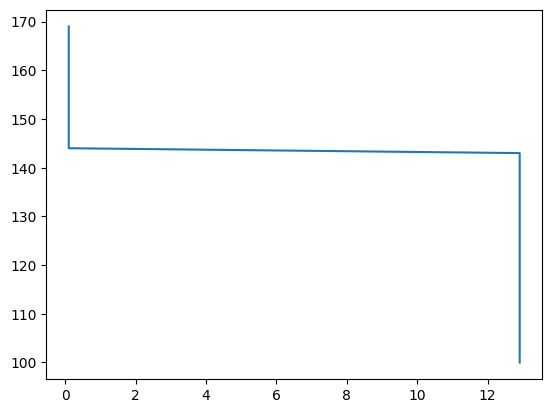

In [11]:
bottomholepressure = []
flows = []

for pressure in range(100,170,1):
  adjuster.setTargetVariable(flowline1.getOutletStream(), "pressure",
    pressure, "bara");
  process.run();
  bottomholepressure.append(pressure)
  flows.append( flowline1.getOutStream().getFlowRate('MSm3/day'))

plt.plot(flows, bottomholepressure)

#Generation of inflow curves

inlet pressure  [94.518406]  otlet pressure  50 flow  0.2  flow regime  INTERMITTENT
inlet pressure  [93.75228781]  otlet pressure  50 flow  0.5  flow regime  INTERMITTENT
inlet pressure  [95.38618328]  otlet pressure  50 flow  1  flow regime  INTERMITTENT
inlet pressure  [106.33308178]  otlet pressure  50 flow  2  flow regime  INTERMITTENT
inlet pressure  [120.50581]  otlet pressure  50 flow  3  flow regime  INTERMITTENT
inlet pressure  [138.34735919]  otlet pressure  50 flow  4  flow regime  INTERMITTENT


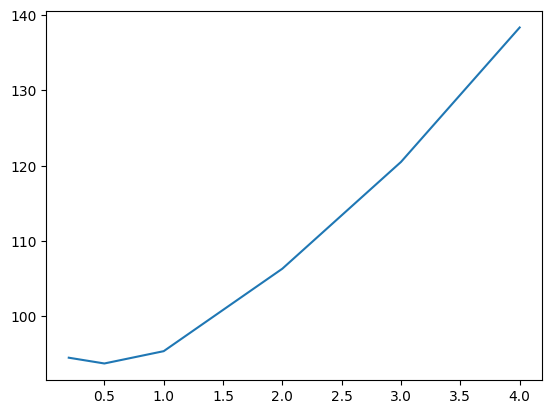

In [63]:
from scipy.optimize import least_squares

outletpressure = 50

#Establish the process
stream1 = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1.clone())
stream1.setFlowRate(10.0, "kg/hr")
stream1.setTemperature(55.0, "C")
stream1.setPressure(50.0, "bara")

pipe = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(stream1);
pipe.setDiameter(0.2);
pipe.setPipeWallRoughness(15e-6);
pipe.setLength(1000);
pipe.setElevation(1000.0);
pipe.setNumberOfIncrements(50);

def calcinpres(inletpressure):
  stream1.setPressure(inletpressure, "bara")
  stream1.run()
  pipe.run()
  return pipe.getOutletPressure()-outletpressure

bottomholepressure = []
flowlist = []

#set flow and outlet pressure to calculate inlet pressure
for flows in [0.2, 0.5, 1, 2, 3, 4 ]:
  flowlist.append(flows)
  stream1.setFlowRate(flows, "MSm3/day")
  inletpres = least_squares(calcinpres, outletpressure+100.0, bounds = ((1.0,  np.inf)),verbose=0);
  bottomholepressure.append(inletpres.x)
  print('inlet pressure ' ,inletpres.x, ' otlet pressure ',  outletpressure,  'flow ', flows, ' flow regime ', pipe.getFlowRegime())

plt.plot(flowlist, bottomholepressure)

#Inflow Performance Relationship (IPR), Tubing Performance Curve (TPC), and Operating Point for a Well

Text(0.5, 0, 'Flow [MSm3/day]')

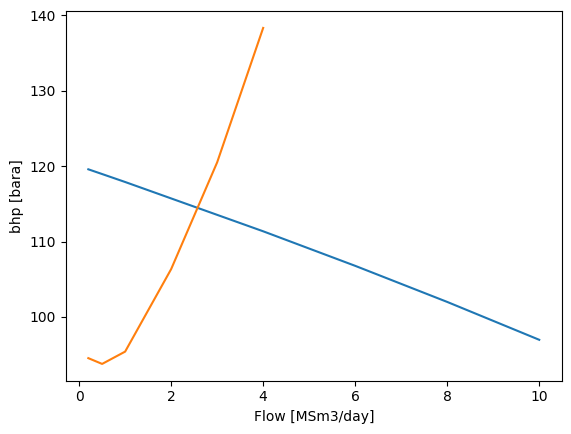

In [70]:
reservoir_pressure = 120

#Establish the process
stream2 = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1.clone())
stream2.setFlowRate(1.0, "MSm3/day")
stream2.setTemperature(55.0, "C")
stream2.setPressure(reservoir_pressure, "bara")
stream2.run()

wellflow = jNeqSim.processSimulation.processEquipment.reservoir.WellFlow("well flow unit");
wellflow.setInletStream(stream2);
wellflow.setWellProductionIndex(0.002);
wellflow.run()

wellflow.getOutletStream().getPressure("bara")

botpres = []
flowlist2 = []
for flows in [0.2, 0.5, 1, 4, 6, 8, 10]:
  flowlist2.append(flows)
  stream2.setFlowRate(flows, "MSm3/day")
  wellflow.run()
  botpres.append(wellflow.getOutletStream().getPressure("bara"))

plt.plot(flowlist2, botpres)
plt.plot(flowlist, bottomholepressure)
plt.ylabel('bhp [bara]')
plt.xlabel('Flow [MSm3/day]')